<a href="https://colab.research.google.com/github/qmeng222/CNN/blob/main/convolution/image_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch

import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline as inl
inl.backend_inline.set_matplotlib_formats("svg")

In [2]:
# import data: https://www.cs.toronto.edu/~kriz/cifar.html
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)
print(cdata)

100%|██████████| 170498071/170498071 [00:01<00:00, 100963272.82it/s]


Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [3]:
# check out the shape of the dataset
print( cdata.data.shape )

# the unique categories
print( cdata.classes )

# .targets is a list of targets converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


👆 50000 32x32 colour training images in 10 classes (5000 images per class).

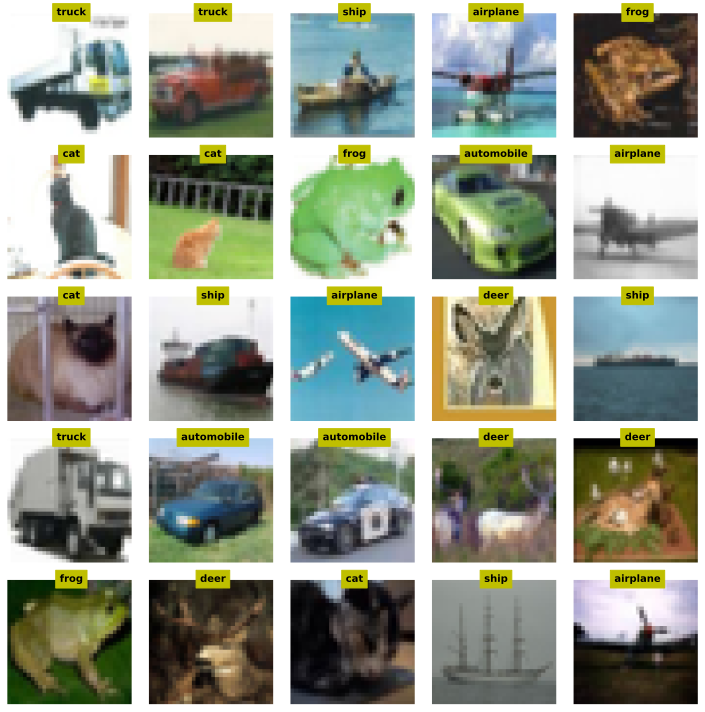

In [4]:
# inspect a few random images：

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))
  pic = cdata.data[randidx,:,:,:] # extract the image
  label = cdata.classes[cdata.targets[randidx]] # extract its label

  # visualize
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

# Apply some transformations:

In [7]:
# group together multiple image transformations into one object:
# conceptually similar to nn.Sequential()
Ts = T.Compose([ T.ToTensor(), # convert np array to tensor & normalize the data
                 T.Resize(32*4), # increase the resolution of the images by a factor of 4
                 T.Grayscale(num_output_channels=1)  ]) # convert image from color into grayscale

# add it to cdata object
cdata.transform = Ts

# # NOTE: if you already know which transformations you want to apply to a data set,
# # you can simply apply the transforms immediately when loading in the data:
# cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)

# NOTE: adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


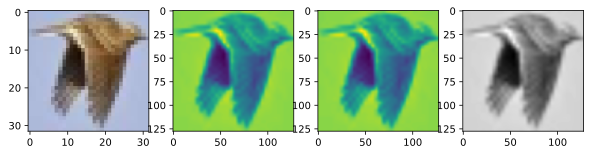

In [11]:
# apply the transform to an image:

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform (because the transform has been added to the cdata object)
img2 = cdata.transform( cdata.data[123,:,:,:] )

# visualize:
fig,ax = plt.subplots(1,4,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:]) # original img
ax[1].imshow(torch.squeeze(img1)) # img1
ax[2].imshow(torch.squeeze(img2)) # img2
ax[3].imshow(torch.squeeze(img2),cmap='gray') # grayscale img2

plt.show()

👆 The resolution of the transformed images has been increased by four times, from 32 to 128.

Ref: https://pytorch.org/vision/stable/transforms.html